In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import KFold
import statistics
from numpy.linalg import norm

In [252]:
Iris=pd.read_csv(r'C:\Users\PLUS\Desktop\Linkpy\iris.data')

In [253]:
Iris.columns
Iris

,one,two,three,four,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [254]:
X=Iris.iloc[:,0:4]
Y=Iris.iloc[:,-1]
list(Y.unique())

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [255]:
sc = StandardScaler()  
X = sc.fit_transform(X) 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
X=pd.DataFrame(X)

In [256]:
#sc = StandardScaler()  
#x_train = sc.fit_transform(x_train)  
#x_test = sc.transform(x_test) 
#len(x_train)

In [278]:
def parameter_Gaussian(x_train,y_train):
    parameter={}
    dict_class_number=dict(y_train.value_counts())
    p_Iris_setosa    =dict_class_number['Iris-setosa']/(y_train.count())
    p_Iris_versicolor=dict_class_number['Iris-versicolor']/(y_train.count())
    p_Iris_virginica =dict_class_number['Iris-virginica']/(y_train.count())
    
    parameter['p_Iris_setosa']    =p_Iris_setosa
    parameter['p_Iris_versicolor']=p_Iris_versicolor
    parameter['p_Iris_virginica'] =p_Iris_virginica

    
    y_train=pd.DataFrame(y_train)
    y_train.reset_index(inplace=True)
    y_train.drop(columns='index',inplace=True)
    x_train=pd.DataFrame(x_train)
    x_train.reset_index(inplace=True)
    x_train.drop(columns='index',inplace=True)
    
    y_Iris_setosa=y_train[y_train=='Iris-setosa']
    y_Iris_setosa.dropna(inplace=True)
    x_Iris_setosa=x_train.iloc[y_Iris_setosa.index,:]
    
    cov_Iris_setosa=x_Iris_setosa.cov()
    x_Iris_setosa=x_Iris_setosa.values
    mean_Iris_setosa=x_Iris_setosa.mean(0)
    parameter['cov_Iris-setosa']=cov_Iris_setosa.values
    parameter['mean_Iris_setosa']=mean_Iris_setosa

    y_Iris_versicolor=y_train[y_train=='Iris-versicolor']
    y_Iris_versicolor.dropna(inplace=True)
    x_Iris_versicolor=x_train.iloc[y_Iris_versicolor.index,:]
    
    cov_Iris_versicolor=x_Iris_versicolor.cov()
    x_Iris_versicolor=x_Iris_versicolor.values
    mean_Iris_versicolor=x_Iris_versicolor.mean(0)
    parameter['cov_Iris-versicolor']=cov_Iris_versicolor.values
    parameter['mean_Iris_versicolor']=mean_Iris_versicolor
    
    y_Iris_virginica=y_train[y_train=='Iris-virginica']
    y_Iris_virginica.dropna(inplace=True)
    x_Iris_virginica=x_train.iloc[y_Iris_virginica.index,:]
    
    cov_Iris_virginica=x_Iris_virginica.cov()
    x_Iris_virginica=x_Iris_virginica.values
    mean_Iris_virginica=x_Iris_virginica.mean(0)
    parameter['cov_Iris-virginica']=cov_Iris_virginica.values
    parameter['mean_Iris_virginica']=mean_Iris_virginica
    
    return parameter

In [351]:
s=parameter_Gaussian(x_train,y_train)


In [352]:
def accuracy_Gaussian(type_x,type_y,s):
    max_class=[]
    predict_true=0
    y_predict=[]
    type_y=type_y.values
    con_row1=np.array([0,0,0])
    I=0
    con_row2=np.array([0,0,0])
    j=0
    con_row3=np.array([0,0,0])
    k=0
    for i in range(len(type_x)):

        pdf_Iris_setosa    =multivariate_normal.pdf(type_x[i], mean=list(s['mean_Iris_setosa']), cov=s['cov_Iris-setosa'])*s['p_Iris_setosa']
        max_class.append(pdf_Iris_setosa)
        
        pdf_Iris_versicolor=multivariate_normal.pdf(type_x[i], mean=list(s['mean_Iris_versicolor']), cov=s['cov_Iris-versicolor'])*s['p_Iris_versicolor']
        max_class.append(pdf_Iris_versicolor)
        pdf_Iris_virginica =multivariate_normal.pdf(type_x[i], mean=list(s['mean_Iris_virginica']), cov=s['cov_Iris-virginica'])*s['p_Iris_virginica']
        max_class.append(pdf_Iris_virginica)
        class_labale=np.argmax(max_class)
        
        if(class_labale==0):
            con_row1=np.array(max_class)+con_row1
            I=I+1
            predict_class='Iris-setosa'
        elif(class_labale==1) :
            j=j+1
            con_row2=np.array(max_class)+con_row2
            predict_class='Iris-versicolor'
        else:
            con_row3=np.array(max_class)+con_row3
            k=k+1
            predict_class='Iris-virginica'
        
        y_predict.append(predict_class)
        if (type_y[i]==predict_class):
            predict_true=predict_true+1
            
        max_class=[]
    accuracy=predict_true/type_x.shape[0]   
    confidence_matrix=np.array([con_row1/I,con_row2/j,con_row3/k])
    for i in range(3):
        for j in range(3):
            if (i!=j):
                confidence_matrix[i][j]=confidence_matrix[i][i]-confidence_matrix[i][j]
    return   accuracy,y_predict,confidence_matrix

In [353]:
def confusion_matrixx(type_y,y_predict):
    Set=set()
    Set.update(y_predict)
    labels=[]
    labels.extend(Set)
    mat = confusion_matrix(type_y, y_predict)
    #labels = y_predict.unique()
    sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
                xticklabels=labels, yticklabels=labels)

    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.show()

In [354]:
accuracy_train,y_predict_train,confidence_matrix=accuracy_Gaussian(x_train,y_train,s)
print('accuracy_train:',accuracy_train)
print('confidence_matrix:',confidence_matrix)
confidence_matrix

array([[0.60523617, 0.60523617, 0.60523617],
       [0.25293079, 0.25293079, 0.25043753],
       [0.09968918, 0.09626835, 0.09968918]])

In [355]:
accuracy_test,y_predict_test,confidence_matrix=accuracy_Gaussian(x_test,y_test,s)
#print('accuracy_test:',accuracy_test)
#print('confidence_matrix:',confidence_matrix)
confidence_matrix

array([[0.77261783, 0.77261783, 0.77261783],
       [0.2349609 , 0.2349609 , 0.23484009],
       [0.07400983, 0.07074075, 0.07400983]])

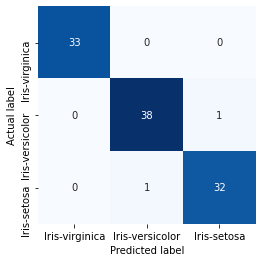

In [322]:
confusion_matrix_train=confusion_matrixx(y_train,y_predict_train)

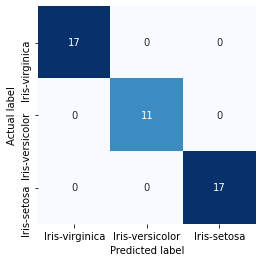

In [323]:
confusion_matrix_test=confusion_matrixx(y_test,y_predict_test)

In [338]:
kf = KFold(n_splits=4)
kf.split(X)

<generator object _BaseKFold.split at 0x0000023C0153A120>

[[0.21964086 0.31877982 0.01399591 0.02412173]
 [0.31877982 0.80635386 0.02275392 0.05701476]
 [0.01399591 0.02275392 0.01266536 0.00591874]
 [0.02412173 0.05701476 0.00591874 0.02173738]]


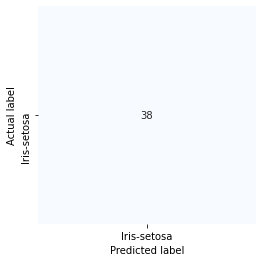

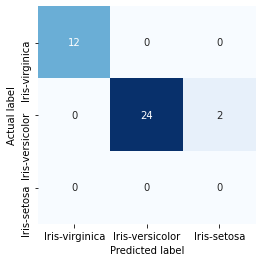

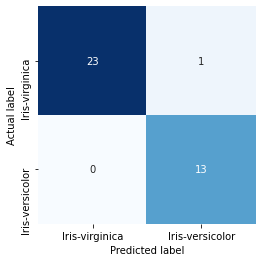

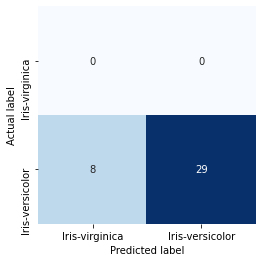

average accuracy on training data: 0.9866268963337548
average accuracy on test data: 0.9260312944523471
confidence_matrix on training data: [array([[0.03351324, 0.03351324, 0.03351324],
       [0.13875657, 0.13875657, 0.1375309 ],
       [0.05334683, 0.05229757, 0.05334683]]), array([[0.28990347, 0.28990347, 0.28990347],
       [0.05819074, 0.05819074, 0.05738068],
       [0.05303704, 0.05260512, 0.05303704]]), array([[0.46473619, 0.46473619, 0.46473619],
       [0.02614479, 0.02614479, 0.02574581],
       [0.02598295, 0.02520579, 0.02598295]]), array([[0.46473619, 0.46473619, 0.46473619],
       [0.13591782, 0.13591782, 0.13567815],
       [0.00645728, 0.00643874, 0.00645728]])]
confidence_matrix on test data: [array([[0.18684118, 0.18684118, 0.18684118],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]]), array([[0.2910151 , 0.2910151 , 0.2910151 ],
       [0.0651796 , 0.0651796 , 0.06396916],
       [0.00092763, 0.00087041, 0.00092763]]), arra

In [339]:
accuracy_train=[]
accuracy_test= []
y_predict_train=[]
y_predict_test=[]
confidence_matrix_train=[]
confidence_matrix_test=[]
print(s['cov_'+Y.unique()[0]])
i=0
for train,test in kf.split(X):
    parameter=parameter_Gaussian(X.loc[train],Y.loc[train])
    accuracy_tr,y_pre_tr,confidence_matrix=accuracy_Gaussian(X.loc[train].values,Y.loc[train],parameter)
    confidence_matrix_train.append(confidence_matrix)
    accuracy_train.append(accuracy_tr)
    y_predict_train.append(y_pre_tr)
    accuracy_te,y_pre_te,confidence_matrix=accuracy_Gaussian(X.loc[test].values,Y.loc[test],parameter)
    y_predict_test.append(y_pre_te)
    accuracy_test.append(accuracy_te)
    confidence_matrix_test.append(confidence_matrix)
    confusion_matrixx(Y.loc[test].values,y_predict_test[i])
    i=i+1
print('average accuracy on training data:',statistics.mean(accuracy_train))
print('average accuracy on test data:',statistics.mean(accuracy_test))
print('confidence_matrix on training data:',confidence_matrix_train)
print('confidence_matrix on test data:',confidence_matrix_test)

accuracy_train: 0.9619047619047619
confidence_matrix: [[0.11076608 0.11076608 0.11076608]
 [0.04085696 0.04085696 0.04036044]
 [0.01259604 0.01210511 0.01259604]]
accuracy_test: 0.9555555555555556
confidence_matrix: [[0.17784518 0.17784518 0.17784518]
 [0.02130125 0.02130125 0.02118768]
 [0.01499344 0.01441081 0.01499344]]


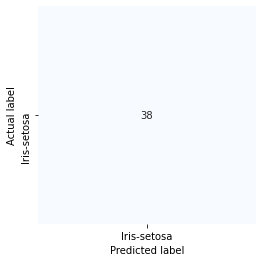

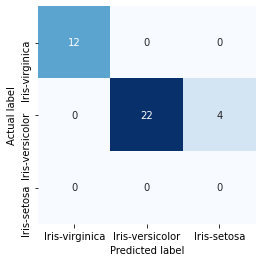

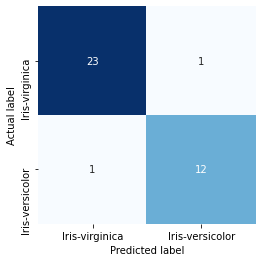

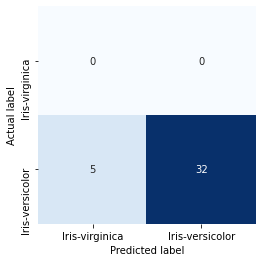

average accuracy on training data: 0.9599597029077117
average accuracy on test data: 0.9263869132290186
confidence_matrix on training data: [array([[0.01572076, 0.01572076, 0.01572076],
       [0.04961135, 0.04961135, 0.04882448],
       [0.02405248, 0.02351995, 0.02405248]]), array([[0.17742496, 0.17742496, 0.17742496],
       [0.01516841, 0.01516841, 0.01504538],
       [0.02411908, 0.0236886 , 0.02411908]]), array([[0.29616325, 0.29616325, 0.29616325],
       [0.01147546, 0.01147546, 0.01107799],
       [0.01201322, 0.01164939, 0.01201322]]), array([[0.29616325, 0.29616325, 0.29616325],
       [0.04836899, 0.04836899, 0.04825543],
       [0.00193217, 0.00184315, 0.00193217]])]
confidence_matrix on test data: [array([[0.12818414, 0.12818414, 0.12818414],
       [0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        ]]), array([[0.18449026, 0.18449026, 0.18449026],
       [0.03052189, 0.03052189, 0.02991153],
       [0.0011499 , 0.00095677, 0.0011499 ]]), arra

In [346]:
for i in range(len(Y.unique())):
    
    d = np.diag(s['cov_'+Y.unique()[i]])
    s['cov_'+Y.unique()[i]]=d

accuracy_train,y_predict_train,confidence_matrix=accuracy_Gaussian(x_train,y_train,s)
print('accuracy_train:',accuracy_train )
print('confidence_matrix:',confidence_matrix )
accuracy_test,y_predict_test,confidence_matrix=accuracy_Gaussian(x_test,y_test,s)
print('accuracy_test:',accuracy_test)
print('confidence_matrix:',confidence_matrix )

accuracy_train=[]
accuracy_test= []
y_predict_train=[]
y_predict_test=[]
confidence_matrix_train=[]
confidence_matrix_test=[]

i=0
for train,test in kf.split(X):
    parameter=parameter_Gaussian(X.loc[train],Y.loc[train])
    for j in range(len(Y.unique())):
        d = np.diag(parameter['cov_'+Y.unique()[j]])
        parameter['cov_'+Y.unique()[j]]=d
    accuracy_tr,y_pre_tr,confidence_matrix=accuracy_Gaussian(X.loc[train].values,Y.loc[train],parameter)
    confidence_matrix_train.append(confidence_matrix)
    accuracy_train.append(accuracy_tr)
    y_predict_train.append(y_pre_tr)
    accuracy_te,y_pre_te,confidence_matrix=accuracy_Gaussian(X.loc[test].values,Y.loc[test],parameter)
    y_predict_test.append(y_pre_te)
    accuracy_test.append(accuracy_te)
    confidence_matrix_test.append(confidence_matrix)
    confusion_matrixx(Y.loc[test].values,y_predict_test[i])
    i=i+1
print('average accuracy on training data:',statistics.mean(accuracy_train))
print('average accuracy on test data:',statistics.mean(accuracy_test))
print('confidence_matrix on training data:',confidence_matrix_train)
print('confidence_matrix on test data:',confidence_matrix_test)

In [360]:
def parameter_Gaussian_naive_Bayes(x_train,y_train):
    
    parameter={}
    dict_class_number=dict(y_train.value_counts())
    p_Iris_setosa    =dict_class_number['Iris-setosa']/(y_train.count())
    p_Iris_versicolor=dict_class_number['Iris-versicolor']/(y_train.count())
    p_Iris_virginica =dict_class_number['Iris-virginica']/(y_train.count())
    
    parameter['p_Iris_setosa']    =p_Iris_setosa
    parameter['p_Iris_versicolor']=p_Iris_versicolor
    parameter['p_Iris_virginica'] =p_Iris_virginica

    
    y_train=pd.DataFrame(y_train)
    y_train.reset_index(inplace=True)
    y_train.drop(columns='index',inplace=True)
    x_train=pd.DataFrame(x_train)
    x_train.reset_index(inplace=True)
    x_train.drop(columns='index',inplace=True)
    
    y_Iris_setosa=y_train[y_train=='Iris-setosa']
    y_Iris_setosa.dropna(inplace=True)
    x_Iris_setosa=x_train.iloc[y_Iris_setosa.index,:]
    
    x_Iris_setosa=x_Iris_setosa.values
    mean_Iris_setosa=x_Iris_setosa.mean(0)
    cov_Iris_setosa=[]
    for j in range(4):
        cov_Iris_setosa.append((1/(len(x_Iris_setosa)-1))*pow(norm(x_Iris_setosa[:,j]-mean_Iris_setosa[j]),2))
        
        
        
        
    parameter['cov_Iris-setosa']=cov_Iris_setosa
    parameter['mean_Iris_setosa']=mean_Iris_setosa

    y_Iris_versicolor=y_train[y_train=='Iris-versicolor']
    y_Iris_versicolor.dropna(inplace=True)
    x_Iris_versicolor=x_train.iloc[y_Iris_versicolor.index,:]
    
    x_Iris_versicolor=x_Iris_versicolor.values
    mean_Iris_versicolor=x_Iris_versicolor.mean(0)
    cov_Iris_versicolor=[]
    for j in range(4):
        cov_Iris_versicolor.append((1/(len(x_Iris_versicolor)-1))*pow(norm(x_Iris_versicolor[:,j]-mean_Iris_versicolor[j]),2))
        
    parameter['mean_Iris_versicolor']=mean_Iris_versicolor
    parameter['cov_Iris-versicolor']=cov_Iris_versicolor
    
    y_Iris_virginica=y_train[y_train=='Iris-virginica']
    y_Iris_virginica.dropna(inplace=True)
    x_Iris_virginica=x_train.iloc[y_Iris_virginica.index,:]
    
    x_Iris_virginica=x_Iris_virginica.values
    mean_Iris_virginica=x_Iris_virginica.mean(0)
    
    cov_Iris_virginica=[]
    for j in range(4):
        cov_Iris_virginica.append((1/(len(x_Iris_virginica)-1))*pow(norm(x_Iris_virginica[:,j]-mean_Iris_virginica[j]),2))
    parameter['cov_Iris-virginica']=cov_Iris_virginica
    parameter['mean_Iris_virginica']=mean_Iris_virginica
    
    return parameter

In [361]:
s=parameter_Gaussian_naive_Bayes(x_train,y_train)

In [373]:
def accuracy_Gaussian_naive_Bayes(type_x,type_y,s):
    max_class=[]
    predict_true=0
    y_predict=[]
    type_y=type_y.values
    con_row1=np.array([0,0,0])
    I=0
    con_row2=np.array([0,0,0])
    J=0
    con_row3=np.array([0,0,0])
    k=0
    for i in range(len(type_x)):
        temp_pdf_Iris_setosa=1
        temp_pdf_Iris_versicolor=1
        temp_Iris_virginica=1
        for  j in range(4):
            pdf_Iris_setosa    =multivariate_normal.pdf(type_x[i][j], mean=s['mean_Iris_setosa'][j], cov=s['cov_Iris-setosa'][j])*s['p_Iris_setosa']
            temp_pdf_Iris_setosa=pdf_Iris_setosa*temp_pdf_Iris_setosa
            
        max_class.append(temp_pdf_Iris_setosa*s['p_Iris_setosa'])
        
        for  j in range(4):
            
            pdf_Iris_versicolor    =multivariate_normal.pdf(type_x[i][j], mean=s['mean_Iris_versicolor'][j], cov=s['cov_Iris-versicolor'][j])
            temp_pdf_Iris_versicolor=pdf_Iris_versicolor*temp_pdf_Iris_versicolor
        max_class.append(temp_pdf_Iris_versicolor*s['p_Iris_versicolor'])
        
        for  j in range(4):
            
            pdf_Iris_virginica    =multivariate_normal.pdf(type_x[i][j], mean=s['mean_Iris_virginica'][j], cov=s['cov_Iris-virginica'][j])
            temp_Iris_virginica=pdf_Iris_virginica*temp_Iris_virginica
        max_class.append(temp_Iris_virginica*s['p_Iris_virginica'])
        class_labale=np.argmax(max_class)
        
        if(class_labale==0):
            con_row1=np.array(max_class)+con_row1
            I=I+1
            predict_class='Iris-setosa'
        elif(class_labale==1) :
            con_row2=np.array(max_class)+con_row2
            
            J=J+1
            predict_class='Iris-versicolor'
        else:
            con_row3=np.array(max_class)+con_row3
            k=k+1
            predict_class='Iris-virginica'
        
        y_predict.append(predict_class)
        if (type_y[i]==predict_class):
            predict_true=predict_true+1
            
        max_class=[]
    
    confidence_matrix=np.array([con_row1/I,con_row2/J,con_row3/k])

    for i in range(3):
        for j in range(3):
            if (i!=j):
                confidence_matrix[i][j]=confidence_matrix[i][i]-confidence_matrix[i][j]
                
    accuracy=predict_true/type_x.shape[0]   
        
    return   accuracy,y_predict,confidence_matrix

In [376]:
accuracy_train,y_predict_train,confidence_matrix=accuracy_Gaussian_naive_Bayes(x_train,y_train,s)
#print('accuracy_train:',accuracy_train)
#print('confidence_matrix:',confidence_matrix)
#confusion_matrix_train=confusion_matrixx(y_train,y_predict_train)
confidence_matrix

array([[0.00343859, 0.00343859, 0.00343859],
       [0.10999951, 0.10999951, 0.10866272],
       [0.0400783 , 0.03851625, 0.0400783 ]])

accuracy_test: 0.9555555555555556
confidence_matrix: [[0.00459308 0.00459308 0.00459308]
 [0.07373511 0.07373511 0.07334197]
 [0.04498033 0.04323244 0.04498033]]


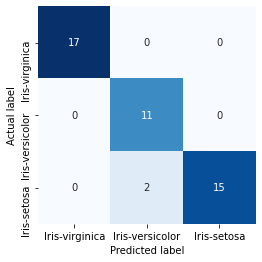

In [375]:
accuracy_test,y_predict_test,confidence_matrix=accuracy_Gaussian_naive_Bayes(x_test,y_test,s)
print('accuracy_test:',accuracy_test)
print('confidence_matrix:',confidence_matrix)
confusion_matrix_train=confusion_matrixx(y_test,y_predict_test)

In [276]:
kf = KFold(n_splits=4)
kf.split(X)

<generator object _BaseKFold.split at 0x0000023C008D3200>

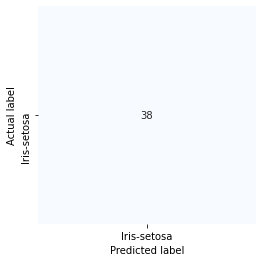

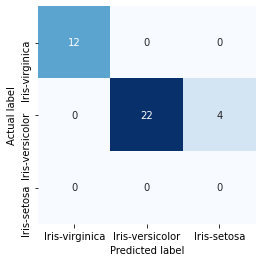

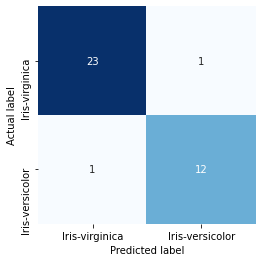

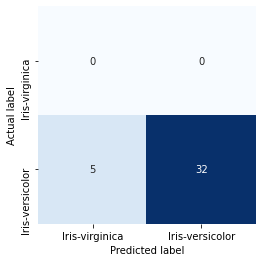

average accuracy on training data: 0.957707806573957
average accuracy on test data: 0.9263869132290186
confidence_matrix on training data: [array([[0.        , 0.        , 0.        ],
       [0.00196759, 0.00196759, 0.00149925],
       [0.0109665 , 0.0104838 , 0.0109665 ]]), array([[0.        , 0.        , 0.        ],
       [0.00196759, 0.00196759, 0.00149925],
       [0.0109665 , 0.0104838 , 0.0109665 ]]), array([[0.        , 0.        , 0.        ],
       [0.00196759, 0.00196759, 0.00149925],
       [0.0109665 , 0.0104838 , 0.0109665 ]]), array([[0.        , 0.        , 0.        ],
       [0.00196759, 0.00196759, 0.00149925],
       [0.0109665 , 0.0104838 , 0.0109665 ]])]
confidence_matrix on test data: [array([[0.        , 0.        , 0.        ],
       [0.00196759, 0.00196759, 0.00149925],
       [0.0109665 , 0.0104838 , 0.0109665 ]]), array([[0.        , 0.        , 0.        ],
       [0.00196759, 0.00196759, 0.00149925],
       [0.0109665 , 0.0104838 , 0.0109665 ]]), array

In [348]:
accuracy_train=[]
accuracy_test= []
y_predict_train=[]
y_predict_test=[]
confidence_matrix_train=[]
confidence_matrix_test=[]
i=0
for train,test in kf.split(X):
    parameter=parameter_Gaussian_naive_Bayes(X.loc[train],Y.loc[train])
    accuracy_tr,y_pre_tr,confidence_matrix=accuracy_Gaussian_naive_Bayes(X.loc[train].values,Y.loc[train],parameter)
    confidence_matrix_train.append(confidence_matrix)
    accuracy_train.append(accuracy_tr)
    y_predict_train.append(y_pre_tr)
    accuracy_te,y_pre_te,confidence_matrix=accuracy_Gaussian_naive_Bayes(X.loc[test].values,Y.loc[test],parameter)
    confidence_matrix_test.append(confidence_matrix)
    accuracy_test.append(accuracy_te)
    y_predict_test.append(y_pre_te)
    confusion_matrixx(Y.loc[test].values,y_predict_test[i])
    i=i+1
print('average accuracy on training data:',statistics.mean(accuracy_train))
print('average accuracy on test data:',statistics.mean(accuracy_test))
print('confidence_matrix on training data:',confidence_matrix_train)
print('confidence_matrix on test data:',confidence_matrix_test)